In [9]:
import os
import sys
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import savemat
sys.path.append("/home/zms24/Desktop") 
import PyalData.pyaldata as pyal # type:ignore

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from tools.curbd import curbd
from tools.dsp.preprocessing import preprocess

np.random.seed(62)

### Import data

In [7]:
data_dir = "/data/raw/M062/M062_2025_03_19_14_00"
mat_file_0= "M062_2025_03_19_14_00_pyaldata_0.mat"
mat_file_1= "M062_2025_03_19_14_00_pyaldata_1.mat"
mat_file_2= "M062_2025_03_19_14_00_pyaldata_2.mat"

fname0 = os.path.join(data_dir, mat_file_0)
fname1 = os.path.join(data_dir, mat_file_1)
fname2 = os.path.join(data_dir, mat_file_2)

df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
df2 = pyal.mat2dataframe(fname2, shift_idx_fields=True)
df = pd.concat([df0, df1, df2], ignore_index=True)
df = df.drop(columns="all_spikes") # the content is incorrect

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field all_KSLabel could not be converted to i

### Preprocess

In [12]:
df_ = preprocess(df, only_trials=True)
BIN_SIZE = df_['bin_size'][0]
# get 'all_rates' column
areas =[ "MOp_rates", "SSp_rates", "CP_rates", "VAL_rates"]
df_ = pyal.merge_signals(df_, areas, "all_rates")

# correct trial length - this is an error in pyaldata
df_['trial_length'] = (df_['trial_length'] / (BIN_SIZE * 100)).astype(int)
df_ = df_[df_['trial_length'] == 200]
df_.reset_index(inplace=True)

# === Metadata ===
session_id = mat_file_0.replace("_pyaldata_0.mat", "")
mouse = session_id.split('_')[0]
perturb_time_idx = df_.idx_sol_on[0]
perturb_time_sec = perturb_time_idx * BIN_SIZE

sol_angles = sorted(df_.values_Sol_direction.unique())
trial_labels = [f"solenoid {angle}" for angle in sol_angles]
num_trials = len(df_)

print(f"Mouse: {mouse}")
print(f"Number of trials: {num_trials}")
print(f"Perturbation time (bins): {perturb_time_idx}, ({perturb_time_sec:.2f} sec)")

/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (198, 200)
Resulting SSp_spikes ephys data shape is (NxT): (95, 200)
Resulting CP_spikes ephys data shape is (NxT): (307, 200)
Resulting MOp_spikes ephys data shape is (NxT): (210, 200)
Mouse: M062
Number of trials: 359
Perturbation time (bins): 66, (1.98 sec)


### Look at X and Y movment sensors

### ['values_MotSen1_X', 'idx_MotSen1_X', 'values_MotSen1_Y', 'idx_MotSen1_Y']

In [23]:
df_.columns

Index(['index', 'animal', 'session', 'trial_id', 'trial_name', 'trial_length',
       'bin_size', 'idx_trial_start', 'idx_trial_end', 'idx_CPI',
       'values_before_camera_trigger', 'idx_before_camera_trigger',
       'idx_motion', 'values_Sol_direction', 'idx_Sol_direction',
       'values_Sol_duration', 'idx_Sol_duration', 'idx_sol_on',
       'idx_earthquake_duration', 'idx_session_timer', 'values_MotSen1_X',
       'idx_MotSen1_X', 'values_MotSen1_Y', 'idx_MotSen1_Y', 'all_chan_best',
       'all_unit_guide', 'all_KSLabel', 'VAL_chan_best', 'VAL_unit_guide',
       'VAL_KSLabel', 'VAL_spikes', 'SSp_chan_best', 'SSp_unit_guide',
       'SSp_KSLabel', 'SSp_spikes', 'CP_chan_best', 'CP_unit_guide',
       'CP_KSLabel', 'CP_spikes', 'MOp_chan_best', 'MOp_unit_guide',
       'MOp_KSLabel', 'MOp_spikes', 'VAL_rates', 'SSp_rates', 'CP_rates',
       'MOp_rates', 'sol_level_id', 'sol_contra_ipsi', 'all_rates'],
      dtype='object')

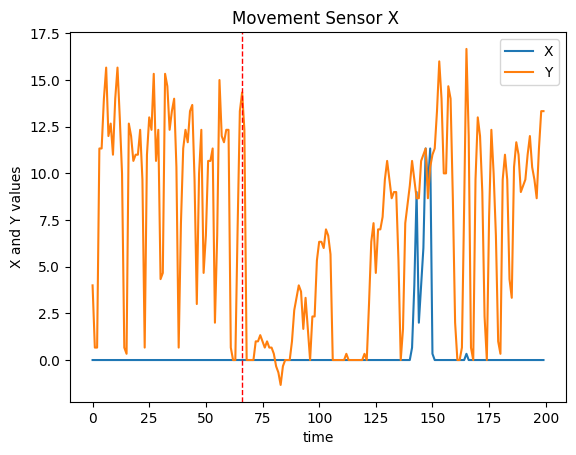

In [21]:
plt.plot(df_['values_MotSen1_X'][0], label = "X")
plt.plot(df_['values_MotSen1_Y'][0], label = "Y")
plt.axvline(x=perturb_time_idx, color='red', linestyle='--', linewidth=1)

plt.xlabel('time')
plt.ylabel('X and Y values')
plt.legend()
plt.title('Movement Sensor X ')
plt.show()